![](img/Logo-unifi.png)

# <center> Algoritmi e Programmazione per l'Analisi dei Dati </center>

## <center> Project Assignment </center>


#### <center> 2019-2020 </center>

##### <center> Guido Bei </center>

#### <div style="text-align: center"> Abstract </div>

<center> The study consists, firstly, in handling with NetworkX graphs, while a second part is dedicated to implement an algorithm for constructing Eulerian paths on graphs, another one for computing degree distribution of graphs and eventually one for estimating the power law exponent. </center>

In [1]:
__AUTHORS__ = {'gb': ("Guido Bei", 
                      "guido.bei@stud.unifi.it",)}

__KEYWORDS__ = ['Python', 'Italian province', 'NetworkX', 'graphs', 'Eulerian path', 'degree distribution', 'power law']

<center><img src='img/python_logo.svg'></center>

# Introduction

We will use Covid-19 data with respect to our country, Italy. Data are available at [Protezione Civile GitHub repository](https://github.com/pcm-dpc/COVID-19) and, especially, we will use JSON province data.

* *Bachelor degree*: Economia e Commercio, UniPi
* *Master degree*: Statistica e Data Science, UniFi
* *GitHub repository*: https://github.com/guidobei
* *Computer*: HP Notebook
* *Operating system*: Windows 10 Home
* *Processor*: Intel Core i5-6200U CPU @ 2.30GHz 2.40GHz
* *Installed RAM*: 4,00 GB
* *System type*: 64-bit operating system, x64-based processor
* *Python release*: Python 3.8.3
* *IDE*: IDLE
* *Environment*: Python Virtual Environment
    * *Libraries installed*:
        * `jupyter`
        * `numpy`
        * `pandas`
        * `matplotlib`
        * `networkx`

In the following slides we will see:

* An Italian province graph `P`

* A graph `R` with 2000 random nodes;

* `P` and `R` graphs in a weighted version;

* The *Seven Bridges of Königsberg* problem;

* An algorithm for constructing `Eulerian path` on graphs;

* An algorithm for computing `degree distribution` of graphs;

* An algorithm for estimating the `power law exponent`.

The following modules will be used:

In [2]:
import random
import numpy as np
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

And the following file is loaded:

In [3]:
with open('data\dpc-covid19-ita-province.json') as f:
    d = json.load(f)

# Italian province graph

The scope of this chapter is to build the undirected graph `P` of Italian provinces, using `NetworkX`, in the most possible efficent way.

Each node corresponds to a city and two cities *a* and *b* are connected by an edge if the following holds: if (*x*, *y*) is the position of *a*, where *x* is the longitude and *y* is the longitude, then *b* is in position (*z*, *w*) with *z* in [*x-d*, *x+d*] and *w* in [*y-d*, *y+d*], with *d* = 0.8.

* `Data cleaning` --> a dictionary of provinces is created, identified by their abbreviations, i.e. `{'LU': (43.84432283, 10.50151366), 'FI': (43.76923077, 11.25588885), 'NA': (40.83956555, 14.25084984), ...}` with 107 provinces;`

In [4]:
def data_cleaning(ls):
    
    '''Funzione che ritorna una dizionario di dati puliti, nel caso in cui venga passata una lista di dizionari. 
    Il dizionario ritornato ha come chiavi le sigle delle province, e come valori le tuple (latitudine, longitudine).'''

    cleaned = {} # creo anche un dizionario con il duplice scopo di accelerare i tempi di controllo quando faccio il while se una provincia è già stata memorizzata e per memorizzare le posizioni
    i = 0
    while i < len(ls) and ls[i].get('sigla_provincia') not in cleaned: # faccio un while in modo che si fermi al primo doppione
        if ls[i].get('sigla_provincia') != '':
            cleaned[ls[i].get('sigla_provincia')] = (ls[i].get('lat'), ls[i].get('long'))
        i += 1
    return cleaned

# Simulated cities graph

We then generate 2000 pairs of double (*x*, *y*) with *x* in [*30*, *50*) and *y* in [*10*, *20*) and the algorithm is repeated, in order to build the undirected graph `R` where each pair is a node and two nodes are connected with the same rule reported above, except for the distance *d* = 0.08.

* `Data generating` --> a dictionary of fake cities is created, identified by a number, i.e. `{26: (43.84432283, 10.50151366), 567: (43.76923077, 11.25588885), 1994: (40.83956555, 14.25084984), ...}` with 2000 cities;

In [5]:
def data_generating(n):
    
    '''Funzione che ritorna un dizionari di dati casuali di n città che hanno latitudine nell'intervallo [30, 50] e 
    longitudine in [10, 20]. 
    Il dizionario ritornato ha come chiavi il numero identificativo della città e come valori le tuple (latitudine,
    longitudine).'''   
    
    casual = {i: (30 + 20 * random.random(), 10 + 10 * random.random()) for i in range(n)}
    return casual

## The algorithm

Hereafter we present the algorithm, step by step:

* The dictionary got from the above processes is split into three lists, for efficient purposes: namely one with province `abbreviations`, one with `latitudes` and one with `longitudes`.

* Lists are sorted by `latitude` or `longitude`, depending on their variances: 
    * if the `latitude` variance of all the nodes is greater than `longitude` one, `latitude` list is sorted and the `longitude` list follows;
    * if the `longitude` variance of all the nodes is greater than `latitude` one, `longitude` list is sorted and the `latitude` list follows;
    * **it is important to maintain the corrispondences amongst the three lists throughout the elaboration**.

* Iteration is performed on the sorted list for city `i` and node is created;

* Another iteration is performed for node `j` starting from the following city: `j=i+1`;

* If the one-dimensionally distance between city `j` and city `i` is less or equal to 0.8 (0.08), the other dimension distance is checked: if also the latter one holds, the two nodes are connected and an edged is traced (with *Euclidean distance* as weight when requested).

* Iteration on `j` stops once a node `j` with distance from node `i` greater than 0.8 (0.08) is reached, as the following ones will necessarily have a greater distance.

* New iteration is then started on `i = i + 1` moving forward the above steps.

* The whole process stops once every city `i` is visited.

In [6]:
def graph(diz, distanza):
    
    '''Funzione che restituisce in tempo lineare un grafo quando le viene passata un dizionario ed una distanza per 
    impostare gli archi.
    Il dizionario passato deve avere la sigla delle provincia come chiave e la tupla (latitudine, longitudine) come valori
    corrispondenti. Se si intende lavorare con il file .json fornito dal dipartimento della Protezione Civile è
    sufficiente pulire i dati con la funzione `data_cleaning(ls)`; se altrimenti si vuole procedere con una simulazione è
    necessario ricorrere alla funzione `casual_data(n)`.
    I vertici sono rappresentati dalle città e si traccia un arco tra di essi se ciò che segue è verificato: sia (x,y) la
    posizione di a, allora b è in posizione (z,w), con z in [x-d, x+d] e w in [y-d, y+d], con d = distanza.'''
    
    nomi = list(diz.keys())
    lat = [avalue[0] for avalue in diz.values()]
    long = [avalue[1] for avalue in diz.values()]
    
    var_lat = np.var(lat)
    var_long = np.var(long)
    
    G = nx.Graph()
        
    if var_lat > var_long:
        tuples = zip(*sorted(zip(lat, nomi, long)))
        lat, nomi, long = [list(tuple) for tuple in tuples]
        edges = []
        for i in range(len(nomi)):
            nome_i = nomi[i]
            G.add_node(nome_i, pos=(long[i], lat[i]))
            j = i + 1
            dist_lat = 0
            while dist_lat <= distanza and j < len(nomi): 
                dist_lat = lat[j] - lat[i] # non prendo il valore assoluto perché è un valore già positivo
                dist_long = abs(long[j] - long[i])
                nome_j = nomi[j]
                if dist_long <= distanza:
                    edges.append((nome_i, nome_j))
                j += 1
    else:
        tuples = zip(*sorted(zip(long, nomi, lat)))
        long, nomi, lat = [list(tuple) for tuple in tuples]
        edges = []
        for i in range(len(nomi)):
            nome_i = nomi[i]
            G.add_node(nome_i, pos=(long[i], lat[i]))
            j = i + 1
            dist_long = 0
            while dist_long <= distanza and j < len(nomi):
                dist_long = long[j] - long[i] # non prendo il valore assoluto perché è un valore già positivo
                dist_lat = abs(lat[j] - lat[i])
                nome_j = nomi[j]
                if dist_lat <= distanza:
                    edges.append((nome_i, nome_j))
                j += 1
                           
    G.add_edges_from(edges)            
    return G

In [7]:
def weighted_graph(diz, distanza):
    
    '''Funzione che restituisce in tempo lineare un grafo pesato quando le viene passata un dizionario ed una distanza per
    impostare gli archi.
    Il dizionario passato deve avere la sigla delle provincia come chiave e la tupla (latitudine, longitudine) come valori
    corrispondenti. Se si intende lavorare con il file .json fornito dal dipartimento della Protezione Civile è
    sufficiente pulire i dati con la funzione `data_cleaning(ls)`; se altrimenti si vuole procedere con una simulazione è
    necessario ricorrere alla funzione `casual_data(n)`.
    I vertici sono rappresentati dalle città e si traccia un arco tra di essi se ciò che segue è verificato: sia (x, y) la
    posizione di a, allora b è in posizione (z,w), con z in [x-d, x+d] e w in [y-d, y+d], con d = distanza.'''
    
    nomi = list(diz.keys())
    lat = [avalue[0] for avalue in diz.values()]
    long = [avalue[1] for avalue in diz.values()]
    
    var_lat = np.var(lat)
    var_long = np.var(long)
    
    G = nx.Graph()
    
    if var_lat > var_long:
        tuples = zip(*sorted(zip(lat, nomi, long)))
        lat, nomi, long = [list(tuple) for tuple in tuples]
        edges = []
        for i in range(len(nomi)):
            nome_i = nomi[i]
            G.add_node(nome_i, pos=(long[i], lat[i]))
            j = i + 1
            dist_lat = 0
            while dist_lat <= distanza and j < len(nomi): 
                dist_lat = lat[j] - lat[i] # non prendo il valore assoluto perché è un valore già positivo
                dist_long = abs(long[j] - long[i])
                nome_j = nomi[j]
                if dist_long <= distanza:
                    Eucl_dist = (dist_lat ** 2 + dist_long ** 2) ** (1/2)
                    edges.append((nome_i, nome_j, Eucl_dist))
                j += 1
    else:
        tuples = zip(*sorted(zip(long, nomi, lat)))
        long, nomi, lat = [list(tuple) for tuple in tuples]
        edges = []
        for i in range(len(nomi)):
            nome_i = nomi[i]
            G.add_node(nome_i, pos=(long[i], lat[i]))
            j = i + 1
            dist_long = 0
            while dist_long <= distanza and j < len(nomi):
                dist_long = long[j] - long[i] # non prendo il valore assoluto perché è un valore già positivo
                dist_lat = abs(lat[j] - lat[i])
                nome_j = nomi[j]
                if dist_lat <= distanza:
                    Eucl_dist = (dist_long ** 2 + dist_lat ** 2) ** (1/2)
                    edges.append((nome_i, nome_j, Eucl_dist))
                j += 1
                           
    G.add_weighted_edges_from(edges)            
    return G

### <center> The Italian province graph P </center>

In [8]:
dati_reali = data_cleaning(d)

![](img/italia.png)

### <center> The simulated province graph R </center>

In [9]:
dati_casuali = data_generating(2000)

![](img/random.png)

## Time complexity analysis

The algorithm implemented in the previous slide is the most efficient we have found for *sparse* graphs: it takes linear time because, when we iterate on a node and since there are few edges, not every other node is scanned. Time complexity is $O(|V|)$, where $|V|$ is the number of nodes.

However, a sorting algorithm has been run whose its time complexity is $O(|V|\log |V|)$.

The expedient of computing the variance before deciding the dimension to be sorted guarantees the robustness of this method: if data had about the same values for a dimension, i.e. `longitude`, an eventual sorting by `longitude` would lead the algorithm to check each node with every node, and time complexity would be $O(V^2)$, the same as checking node by node with a two-nested for loop.

In [10]:
P = graph(dati_reali, 0.8)
R = graph(dati_casuali, 0.08)

In [11]:
%timeit P = graph(dati_reali, 0.8)
%timeit R = graph(dati_casuali, 0.08)

2.01 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.9 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Eulerian Path

In graph theory, an **Eulerian path** is a trail in a finite graph that visits every edge exactly once (allowing for revisiting vertices) and the graph is said to be *semi-Eulerian*. Similarly, an **Eulerian circuit** is an **Eulerian path** that starts and ends on the same vertex, and the graph is said to be *Eulerian*. 

They were first discussed by Leonhard Euler (1707-1783) while solving the famous Seven Bridges of Königsberg problem in 1736.

## Seven Bridges of Königsberg

In the 18th century, Königsberg in Prussia (now Kaliningrad, Russia), flowed through by the Pregel River and its tributaries, used to have two extensive islands that are connected to each other and to the two main areas of the city by seven bridges.

![](img\seven_bridges.png)

An urban legend says that, on Sundays, the wealthy citizens of Königsberg used to walk around their city trying in vain to follow a path that crosses each bridge once and only once.

### Euler's approach

The resolution of the problem was entrusted to the best living mathematician Leonard Euler, who showed that the hypothesized walk was not possible.

* **Abstraction of the map** --- by removing all the contingent aspects with the exception of urban areas delimited by the river arms and bridges that connect them.

![](img/7_bridges.png)

* **Modelling as a graph** --- by replacing each urban area with a point, now called `vertex`, and each bridge with a segment, called `edge`, inventing the modern graph theory.

![](img/Grafo_ABCD.png)

* **Attributing a number to each node** --- by computing how many edges a vertex is touched by, called `degree`.

![](img/vertex-degrees.png)

### Euler's theorem and solution

Before reaching a conclusion, Euler hypothesized different situations of zones and bridges: with four nodes and four bridges it is possible to start, for example, from A, and to go back through all the bridges once and only once. The degree of each node is an even number. If instead we start from A to get to D, each node is of equal degree with the exception of two nodes, of odd degree (1). Based on these observations, Euler enunciated the following theorem:
> *Any connected graph is walkable if and only if it has all the nodes of even degree (**Eulerian circuit**), or two of them are of odd degree (**Eulerian path**); to traverse a "possible" graph with two nodes of odd degree, it is necessary to start from one of them, and it will end on the other odd node.*

* **Eulerian path**: two nodes of odd degree and all the other ones of even degree.

* **Eulerian circuit**: every node of even degree.

Hence, the *Seven Bridges of Königsberg* problem has no solution, because every node has an odd degree.



## Fleury's algorithm

**Fleury's algorithm** (1883) is an elegant but inefficient algorithm that construct **Eulerian paths** and **Eulerian circuits**.

Here we present the algorithm, step by step:

* A graph is checked to have all edges in the same component and all nodes of even degree or exactly two of them of odd degree. 

* The algorithm starts at a vertex of odd degree, or, if the graph has none, it starts with an arbitrarily chosen vertex. 


* An edge whose removal would not disconnect the graph, called `bridge`, is chosen.

* To detect a `bridge`, we set up an ancillary algorithm that uses `DFS`:
    * let *G* be the graph and (*u*, *v*) the interested edge;
    * let *i* be the number of nodes reachable in *G* starting from *u*;
    * let us remove edge (*u*, *v*): a new graph *G'* is obtained;
    * let *j* be the number of nodes reachable in *G'* starting from *u*;
    * if *i* = *j* or *j* = 0, then edge(*u*, *v*) is not a `bridge`;
    * otherwise, edge(*u*, *v*) is a `bridge`.

* The process move on to the other endpoint of that edge and deletes the edge.

* The above steps are repeated until the algorithm stops once there are no edges left, and the sequence forms an **Eulerian cycle** if the starting point is the same as the ending point, or an **Eulerian path** if the starting point is different from the ending point.

In [12]:
def eulerian_path(G):
    
    """Funzione che prende in input un grafo e che stabilisce, in primis, se questo è Euleriano, e, se questo è verificato, 
    ritorna il cammino euleriano.
    La funzione è implementata secondo l'algoritmo di Fleury."""
    
    CC = list(nx.connected_components(G))
    CC_count = 0
    for c in CC:
        if len(c) != 1:
            CC_count += 1
    if CC_count != 1:
        return 'This graph is not Eulerian nor semi-Eulerian.'
    
    edges = G.edges
    degree = G.degree    
    nodes = list(G.nodes)
    
    odd_degree_nodes = 0
    odd_list = []
    for anode in nodes:
        if degree[anode] % 2 != 0:
            odd_degree_nodes += 1
            odd_list.append(anode)
            
    edge_path = []
    if odd_degree_nodes == 2:
        next_node = odd_list[random.randint(0, len(odd_list)-1)]
        while edges:
            current_node = next_node
            node_edges = list(edges(current_node))
            arandom = random.randint(0, len(node_edges)-1)
            edge = node_edges[arandom]
            if not is_bridge(edge, G):
                edge_path.append(current_node)
                next_node = edge[1]
                G.remove_edge(*edge)
        edge_path.append(next_node)
        return edge_path
      
    elif odd_degree_nodes == 0:
        next_node = nodes[random.randint(0, len(nodes)-1)]
        while edges:
            current_node = next_node
            node_edges = list(edges(current_node))
            arandom = random.randint(0, len(node_edges)-1)
            edge = node_edges[arandom]
            if not is_bridge(edge, G):
                edge_path.append(current_node)
                next_node = edge[1]
                G.remove_edge(*edge)
        edge_path.append(next_node)
        return edge_path
    
    else:
        return 'This graph is not Eulerian nor semi-Eulerian.'
    
def is_bridge(edge, G):
    
    """Funzione ausiliaria all'algoritmo di Fleury che stabilisce se un arco è un ponte oppure no. Prende in input l'arco
    stesso ed il grafo interessato."""
    
    H = G.copy()
    next_node = edge[0]
    i = dfs(next_node, H) - 1
    H.remove_edge(*edge)
    j = dfs(next_node, H) - 1
    if i == j or j == 0:
        return False
    return True

def dfs(next_node, G):
    
    '''Funzione di Depth First Search (DFS).'''
    
    nodes = list(G.nodes())
    colors = {anode: 'white' for anode in nodes}
    return visit(next_node, colors, G)

def visit(current, colors, G, count=0):
    
    '''Funzione ausiliara alla DFS.'''
    
    count += 1
    colors[current] = 'grey'
    adj = list(G.adj[current])
    for anode in adj:
        if colors[anode] == 'white':
            count = visit(anode, colors, G, count)
    return count

### Applications

Our algorithm cannot be applied to our `P` and `R` graphs, as, firstly, they are not connected graphs.

In [13]:
P = graph(dati_reali, 0.8)
eulerian_path(P)

'This graph is not Eulerian nor semi-Eulerian.'

In [14]:
R = graph(dati_casuali, 0.08)
eulerian_path(R)

'This graph is not Eulerian nor semi-Eulerian.'

#### Eulerian path

Let's create an Eulerian graph as example, with exactly two odd nodes.

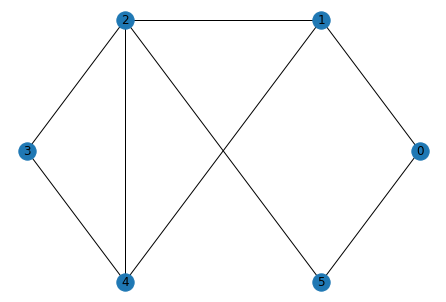

In [15]:
K = nx.Graph()
K.add_nodes_from([0, 1, 2, 3, 4, 5])
K.add_edges_from([(0, 1), (0, 5), (1, 2), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4)])
nx.draw_shell(K, with_labels=True)

Let's start our algorithm from an odd vertex, i.e. *1*, and let's remove edge (*1*, *4*), which is not a *bridge*.

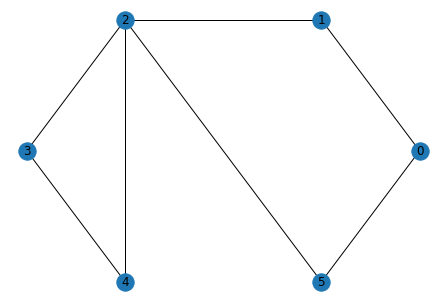

In [16]:
K.remove_edge(*(1, 4))
nx.draw_shell(K, with_labels=True)

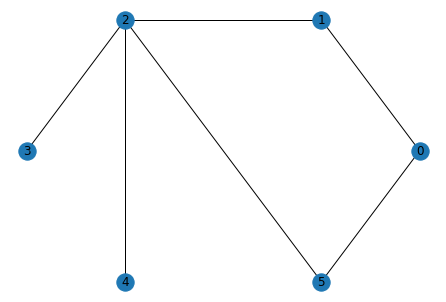

In [17]:
K.remove_edge(*(4, 3))
nx.draw_shell(K, with_labels=True)

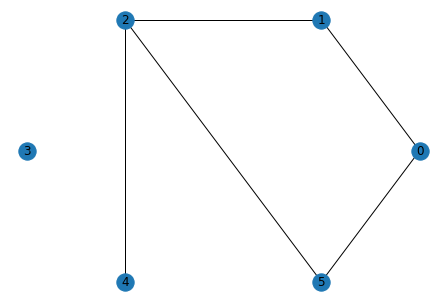

In [18]:
K.remove_edge(*(3, 2))
nx.draw_shell(K, with_labels=True)

At this point, we should be careful. If we choose edge (*2*, *4*), we would get stuck in *4* and we would not be able to visit the other nodes. Edge (*2*, *4*) is so a *bridge*.

We then move on vertex *5*.

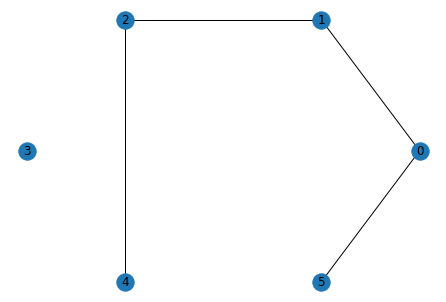

In [19]:
K.remove_edge(*(2, 5))
nx.draw_shell(K, with_labels=True)

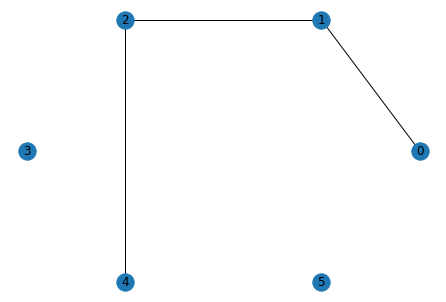

In [20]:
K.remove_edge(*(5, 0))
nx.draw_shell(K, with_labels=True)

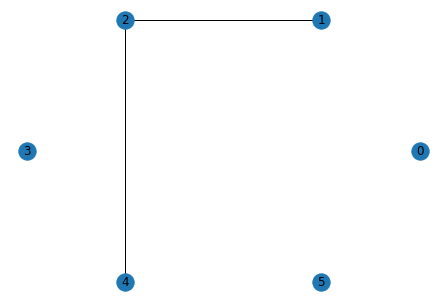

In [21]:
K.remove_edge(*(0, 1))
nx.draw_shell(K, with_labels=True)

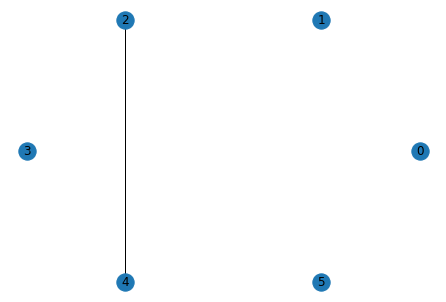

In [22]:
K.remove_edge(*(1, 2))
nx.draw_shell(K, with_labels=True)

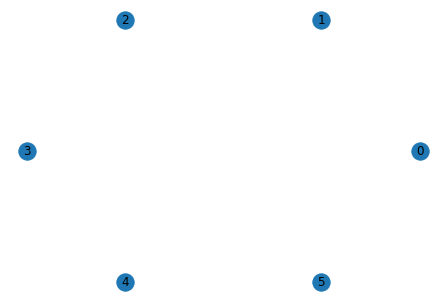

In [23]:
K.remove_edge(*(2, 4))
nx.draw_shell(K, with_labels=True)

The process is complete and we got an **Eulerian path** $[1, 4, 3, 2, 5, 0, 1, 2, 4]$ 

[1, 4, 3, 2, 5, 0, 1, 2, 4]

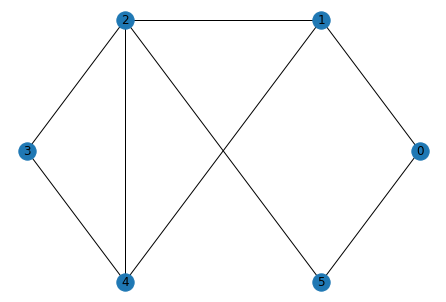

In [24]:
K = nx.Graph()
K.add_nodes_from([0, 1, 2, 3, 4, 5])
K.add_edges_from([(0, 1), (0, 5), (1, 2), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4)])
nx.draw_shell(K, with_labels=True)
eulerian_path(K)

#### Eulerian circuit: *House of St. Niklas*

Let's now see a graph that has an **Eulerian circuit**.

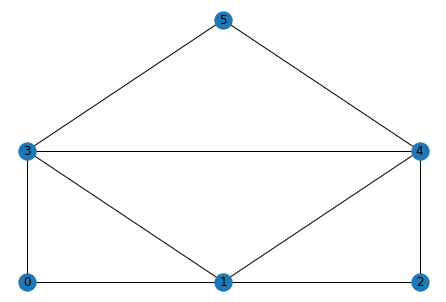

In [25]:
Q = nx.Graph()
Q.add_nodes_from([0, 1, 2, 3, 4, 5])
Q.add_edges_from([(0, 1), (0, 3), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5)])
pos = {0: (0, 0), 1: (0.5, 0), 2: (1, 0), 3: (0, 4), 4: (1, 4), 5: (0.5, 8)}
nx.draw(Q, pos=pos, with_labels=True)

In this case, we can choose any vertex as starting point, since all the nodes are of even degree: we would never get stuck.

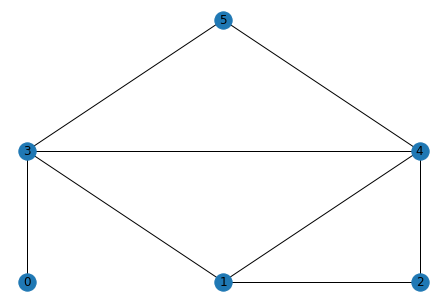

In [26]:
Q.remove_edge(*(0, 1))
nx.draw(Q, pos=pos, with_labels=True)

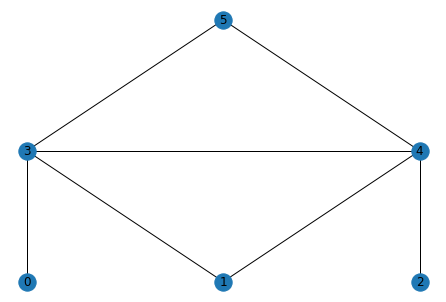

In [27]:
Q.remove_edge(*(1, 2))
nx.draw(Q, pos=pos, with_labels=True)

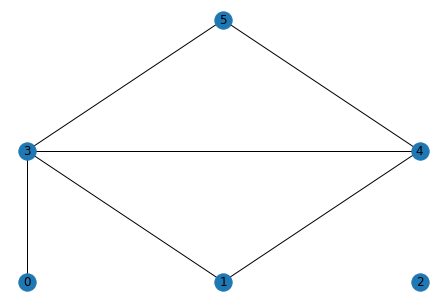

In [28]:
Q.remove_edge(*(2, 4))
nx.draw(Q, pos=pos, with_labels=True)

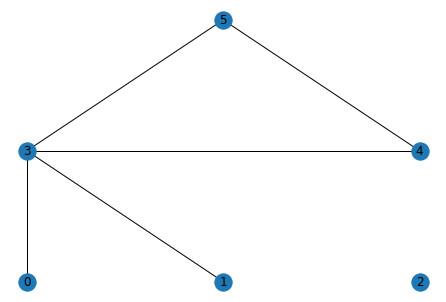

In [29]:
Q.remove_edge(*(4, 1))
nx.draw(Q, pos=pos, with_labels=True)

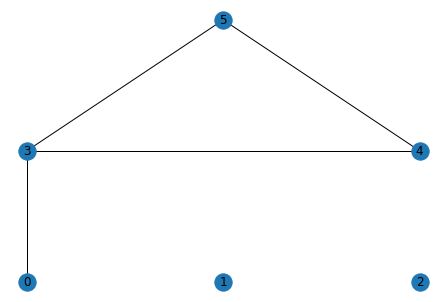

In [30]:
Q.remove_edge(*(1, 3))
nx.draw(Q, pos=pos, with_labels=True)

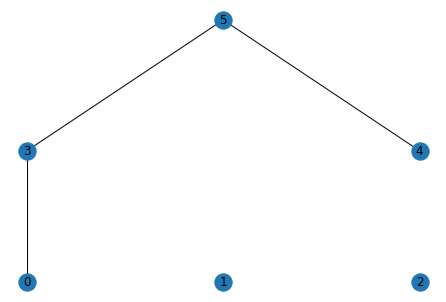

In [31]:
Q.remove_edge(*(3, 4))
nx.draw(Q, pos=pos, with_labels=True)

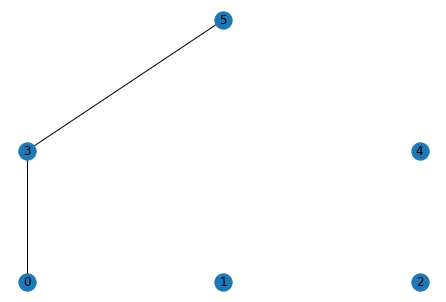

In [32]:
Q.remove_edge(*(4, 5))
nx.draw(Q, pos=pos, with_labels=True)

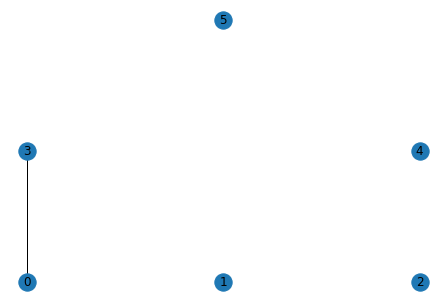

In [33]:
Q.remove_edge(*(5, 3))
nx.draw(Q, pos=pos, with_labels=True)

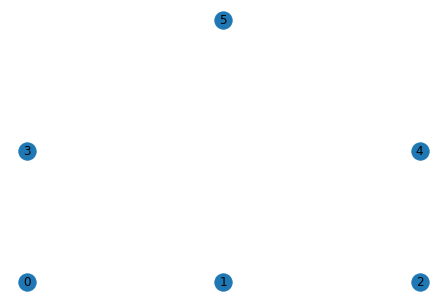

In [34]:
Q.remove_edge(*(3, 0))
nx.draw(Q, pos=pos, with_labels=True)

The process is complete and we got an **Eulerian circuit** $[0, 1, 2, 4, 1, 3, 4, 5, 3, 0]$ 

[0, 1, 4, 2, 1, 3, 5, 4, 3, 0]

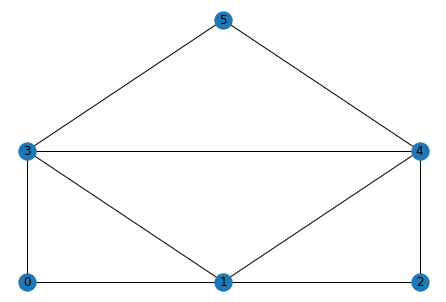

In [35]:
Q = nx.Graph()
Q.add_nodes_from([0, 1, 2, 3, 4, 5])
Q.add_edges_from([(0, 1), (0, 3), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5)])
pos = {0: (0, 0), 1: (0.5, 0), 2: (1, 0), 3: (0, 4), 4: (1, 4), 5: (0.5, 8)}
nx.draw(Q, pos=pos, with_labels=True)
eulerian_path(Q)

### Time complexity analysis

While the graph traversal in **Fleury's algorithm** is linear in the number of edges, i.e. $O(|E|)$, an algorithm for detecting *bridges* has to be taken into account: this is linear in the number of edges as well, since a `DFS` is run.

**Fleury's algorithm** will then have a time complexity of $O(|E|^2)$.

# Centrality

In graph theory, indicators of **centrality** identify the most important vertices within a graph.

**Centrality** indices are answers to the question "What characterizes an important vertex?". The answer is given in terms of a real-valued function on the vertices of a graph, where the values produced are expected to provide a ranking which identifies the most important nodes.

## Degree centrality

Historically first and conceptually simplest meausure of centrality is **degree centrality**, which is defined as the number of links incident upon a node (i.e., the number of edges leaving a vertex).

A related index is the **degree distribution** that is the probability distribution of these degrees over the whole network.

### Degree distribution

The **degree distribution** $P(d)$ of a graph is then defined to be the fraction of nodes in the network with degree $d$. Thus if there are $V$ nodes in total in a graph and $n_k$ of them have degree $d$, we have $P(d)$ = $n_d/V$.

In [36]:
def degree_distribution(G):
    
    '''Funzione che prende in input un grafo e ritorna un vocabolario che ha come chiavi i gradi e come valori le
    frequenze.'''
    
    degree = dict(G.degree)
    degree_list = list(degree.values())
    degree_voc = {adegree: None for adegree in degree_list} # faccio un vocabolario in modo da eliminare tutti i doppioni (mi costa O(n))
    degree_list_ = [adegree for adegree in degree_voc] # riconverto tutto in lista
    degree_list_.sort() # ordino la lista (mi costa(O(n*log(n)))
    n = len(degree)
    freq = [0]*(max(degree_list_)+1)
    for i in degree_list:
        freq[i] = freq[i] + 1
    distr_dict = {}
    for i in degree_list_:
        distr_dict[i] = freq[i] / n
    return distr_dict

def freq(G, k):
    
    '''Funzione che prende in input un grafo ed un grado e ritorna la rispettiva frequenza'''
    
    return degree_distribution(G).get(k)

In [37]:
degree_distribution(P)

{0: 0.009345794392523364,
 1: 0.028037383177570093,
 2: 0.09345794392523364,
 3: 0.06542056074766354,
 4: 0.11214953271028037,
 5: 0.12149532710280374,
 6: 0.12149532710280374,
 7: 0.12149532710280374,
 8: 0.07476635514018691,
 9: 0.07476635514018691,
 10: 0.07476635514018691,
 11: 0.028037383177570093,
 12: 0.037383177570093455,
 13: 0.009345794392523364,
 14: 0.028037383177570093}

![](img/degree_distribution_P.png)

In [38]:
degree_distribution(R)

{0: 0.751, 1: 0.2175, 2: 0.031, 3: 0.0005}

![](img/degree_distribution_R.png)

### Power Law

In social network, it seems that the degree distribution $P(d)$ follows a power law: $P(d)$ ∝ $\frac{1}{d^γ}$, for some constant $γ$, typically $1 ≤ γ ≤ 3$.

![](img/power_law.png)

#### Power Law Exponent estimation

We would like to estimate the exponent $γ$ for our two graphs `P` and `R`.

There are many ways of estimating the value the **power law exponent**. We will used one based on the method of maximum likelihood.

Clauset et al. (2009) proposed the MLE for a discrete dataset, much more complicated than the continuos case, showing that the appropriate estimator for $α$ is given by the solution to the transcendental equation $\frac{ζ′(\hat{α}, x_{min})}{ζ(\hat{α}, x_{min})} = -\frac{1}{n}\sum_{i=1}^n \ln x_i$. In practice, evaluation of $\hat{α}$ requires us to solve this equation numerically. Alternatively, one can estimate $α$ by direct numerical maximization of the likelihood function itself, or equivalently of its logarithm (which is usually simpler): $L(α) = −n \ln ζ(α, x_{min}) − α\sum_{i=1}^n\ln x_i$,

where $ζ(α, x_{min}) = \sum_{n=0}^\infty(n + x_min)^{-α} $

We then fix an $x_{min}$, greater than $0$, we calculate each likelihood score for any $α$ in $[1.06, 7.00]$ and we finally take the $α$ which has release the maximum score.

In [39]:
def exponent_power_law(G, xmin=1):
    
    """Funzione che prende in input un grafo ed un x minimo (grado minimo da cui si vuole partire per la stima) e ritorna
    una stima dell'esponente della power law.
    xmin > 0, default=1."""
    
    deg = list(dict(G.degree).values())
    x = []
    for el in deg:
        if el >= xmin:
            x.append(el)
    n = len(x)
    intervallo = []
    for i in range(1, 1001):
        q = 1 + 6*i/1000
        intervallo.append(q)
    LL = {}
    for alfa in intervallo:
        zeta = 0
        for i in range(10000):
            zeta = zeta + (i + xmin) ** (-alfa)
        likelihood = -n*zeta - alfa*sum(np.log(x))
        LL[alfa] = likelihood
        
    alfa_hat = max(LL, key=LL.get)
    return alfa_hat

Let's see `P`.

In [40]:
exponent_power_law(P, 1)

1.75

![](img/exponent_power_law_P_1.png)

Let's fit a power law starting from 7, degree from which the frequency seemed to decrease.

In [41]:
exponent_power_law(P, 7)

1.558

![](img/exponent_power_law_P_7.png)

And now let's get done with `R`.

In [42]:
exponent_power_law(R, 1)

3.742

![](img/exponent_power_law_R_1.png)